![](data/node.png)


![](data/acti.png)


![](data/neural.jpg)

In [3]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


from sklearn.neural_network import MLPClassifier

In [ ]:
muon = pd.read_csv('data/muon.csv')
muon.head()

In [ ]:
muon.info()

In [ ]:
X = muon[['production','mass','min_ANNmuon']]

In [ ]:
y = muon.signal

In [ ]:
set(y)

In [ ]:
X

In [ ]:
X_s = StandardScaler().fit_transform(X)

X_train,X_test, y_train, y_test = tts(X_s,y)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation= 'tanh', max_iter= 500)
mlp.fit(X_train,y_train)

In [ ]:
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)

In [ ]:
y_prob

In [ ]:
confusion = confusion_matrix(y_test,y_pred)
ax=sns.heatmap((confusion/len(y_pred)*100), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.xlabel('prediccion')
plt.ylabel('verdad')
plt.title('confusion')
plt.show();

In [ ]:
fpr, tpr, umb=roc_curve(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.title('ROC curve: AUC={}'.format(auc))
plt.show();

### CNN (Convolutional Neural Network)


https://en.wikipedia.org/wiki/Convolution


![](data/neural2.webp)

![](data/neural3.gif)

![](data/neural4.png)

In [4]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
def secuencia(lst, steps):
    
    X,y=[],[]
    
    for i in range(len(lst)):
        
        idx=i+steps
        
        if idx>len(lst)-1:break
            
        s_x, s_y=lst[i:idx], lst[idx]
        X.append(s_x)
        y.append(s_y)
        
    return np.array(X), np.array(y)

In [ ]:
raw_seq = [10,20,30,40,50,60,70,80,90]
steps = 3

In [ ]:
X,y = secuencia(raw_seq,steps)

In [ ]:
X

In [ ]:
n_features=1

In [ ]:
X=X.reshape((X.shape[0], X.shape[1], n_features))

X

In [ ]:
len(X)

In [ ]:
len(y)

In [ ]:
#Modelo
modelo = Sequential()
modelo.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu', input_shape =(steps,n_features)))
modelo.add(MaxPooling1D(pool_size = 2))
modelo.add(Flatten())
modelo.add(Dense(1))

modelo.compile(optimizer='adam', loss = 'mse')

modelo.fit(X,y, epochs = 1000, verbose =0)


In [ ]:
modelo.summary()

In [ ]:
x_input = np.array([50,60,70]).reshape((1,steps, n_features))
x_input

In [ ]:
y_pred = modelo.predict(x_input,verbose = 1)


In [ ]:
y_pred

In [ ]:
!python -m pip install keract --user

In [ ]:
fashion=pd.read_csv('data/fashion-mnist.csv')

fashion.head()

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(fashion.values[9,1:].reshape(28,28))
plt.show();

In [31]:
import keras

from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [ ]:
input_shape=(28, 28, 1)

In [ ]:
X = np.array(fashion.iloc[:,1:])
y = to_categorical(np.array(fashion.iloc[:,0]))

In [ ]:
X[0].shape

In [ ]:
X_train,x_test,y_train ,y_test = tts(X,y)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255

x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255

In [ ]:
X_train[0].shape

In [ ]:
batch = 256
n_clases = 10
epocas = 50

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(Conv2D(32, kernel_size = (3,3),activation = 'relu',
          kernel_initializer = 'he_normal', input_shape = input_shape))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Flatten())
modelo.add(Dense(128,  activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(n_clases, activation='softmax'))


In [ ]:
modelo.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
modelo.summary()

In [ ]:
historico = modelo.fit(X_train,y_train, batch_size= batch , epochs = epocas, verbose =1)

In [ ]:
score = modelo.evaluate(x_test,y_test, verbose = 0)

In [ ]:
print('Perdida de testeo: ',score[0])
print('Accuracy de testeo: ',score[1])

In [ ]:
historico.history

In [ ]:
acc=historico.history['accuracy']
loss=historico.history['loss']

epocas=range(len(acc))

In [ ]:
epocas

In [ ]:
plt.plot(epocas, acc, 'bo', label='train acc')
plt.plot(epocas, loss, 'ro', label='train loss')
plt.legend()
plt.show();

In [ ]:
x_test

In [ ]:
from keract import get_activations, display_activations

In [ ]:
keract_inputs = x_test[:1]
keract_targets = y_test[:1]

activations = get_activations(modelo,keract_inputs)
display_activations(activations, cmap = 'gray', save = False)

In [ ]:
from keract import get_activations, display_heatmaps

In [ ]:
display_heatmaps(activations, keract_inputs, save=False)

In [5]:
df = pd.read_csv('data/jena_climate_2009_2016.csv')

In [6]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


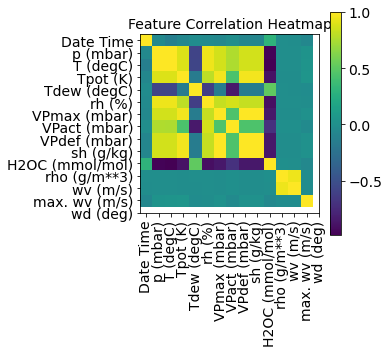

<Figure size 432x288 with 0 Axes>

In [7]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()
    plt.savefig('data/heat_weather.png')

show_heatmap(df)


![](data/time_weather.png)

In [ ]:
feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

In [8]:
split_fraction = 0.715

train_split = int(split_fraction *int(df.shape[0]))

In [9]:
train_split

300693

![](data/lstm_legend.png)

In [10]:
step = 6
past = 720 
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10

In [11]:
scaler = StandardScaler()

In [14]:
feature_keys

['p (mbar)',
 'T (degC)',
 'Tpot (K)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wv (m/s)',
 'max. wv (m/s)',
 'wd (deg)']

In [15]:
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
selected_features

['p (mbar)',
 'T (degC)',
 'VPmax (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'rho (g/m**3)',
 'wv (m/s)']

In [16]:
features = df[selected_features]
features

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
0,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
1,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
2,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
3,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
4,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32
...,...,...,...,...,...,...,...
420546,1000.07,-4.05,4.52,1.22,2.06,1292.98,0.67
420547,999.93,-3.35,4.77,1.44,2.07,1289.44,1.14
420548,999.82,-3.16,4.84,1.55,2.05,1288.39,1.08
420549,999.81,-4.23,4.46,1.26,1.99,1293.56,1.49


In [17]:
features.index = df[date_time_key]

In [18]:
features

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32
...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,4.52,1.22,2.06,1292.98,0.67
31.12.2016 23:30:00,999.93,-3.35,4.77,1.44,2.07,1289.44,1.14
31.12.2016 23:40:00,999.82,-3.16,4.84,1.55,2.05,1288.39,1.08


In [19]:
features = scaler.fit_transform(features.values, train_split)

In [20]:
features = pd.DataFrame(features)

In [21]:
features

,0,1,2,3,4,5,6
0,0.874230,-2.074013,-1.323974,-0.780587,-1.536973,2.293606,-0.010271
1,0.880212,-2.120313,-1.336896,-0.782629,-1.555797,2.344887,-0.015008
2,0.875426,-2.132184,-1.339480,-0.784671,-1.559562,2.355894,-0.023106
3,0.873033,-2.108441,-1.333019,-0.786713,-1.544502,2.329628,-0.020814
4,0.873033,-2.103692,-1.331727,-0.786713,-1.544502,2.324875,-0.021120
...,...,...,...,...,...,...,...
420546,1.298949,-1.602704,-1.170208,-0.576373,-1.491794,1.924126,-0.015772
420547,1.282199,-1.519602,-1.137904,-0.531447,-1.488029,1.835571,-0.008591
420548,1.269039,-1.497046,-1.128859,-0.508983,-1.495559,1.809305,-0.009507
420549,1.267842,-1.624073,-1.177961,-0.568205,-1.518148,1.938635,-0.003243


In [22]:
train_data = features.loc[0:train_split -1]
val_data = features.loc[train_split:]

In [23]:
start = past+future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
x_train

array([[ 0.87422976, -2.0740129 , -1.32397418, ..., -1.53697269,
         2.29360559, -0.01027133],
       [ 0.88021172, -2.12031274, -1.33689573, ..., -1.55579703,
         2.34488743, -0.01500801],
       [ 0.87542615, -2.1321845 , -1.33948004, ..., -1.5595619 ,
         2.35589427, -0.02310621],
       ...,
       [-0.17620162,  0.90104863,  0.76027151, ...,  1.39209434,
        -0.93389863, -0.01164649],
       [-0.18218358,  0.89511275,  0.75122643, ...,  1.38832947,
        -0.92989615, -0.01164649],
       [-0.17500523,  0.86187184,  0.70729316, ...,  1.39585921,
        -0.90012766, -0.01256327]])

In [24]:
x_train.shape

(300693, 7)

In [25]:
features[1]

0        -2.074013
1        -2.120313
2        -2.132184
3        -2.108441
4        -2.103692
            ...   
420546   -1.602704
420547   -1.519602
420548   -1.497046
420549   -1.624073
420550   -1.694117
Name: 1, Length: 420551, dtype: float64

In [26]:
y_train = features.iloc[start:end][1]

In [27]:
y_train

792      -2.838554
793      -2.793441
794      -2.731708
795      -2.686595
796      -2.596370
            ...   
301480    0.255225
301481    0.192305
301482    0.246915
301483    0.289653
301484    0.231482
Name: 1, Length: 300693, dtype: float64

In [40]:
sequence_length = int(past/step)

In [41]:
sequence_length

120

In [42]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [44]:
x_end = len(val_data) - past - future

label_start = train_split+past+future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

In [45]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [52]:
dataset_val

<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>

In [46]:
for batch in dataset_train.take(1):
    inputs, targets = batch

In [47]:
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256,)


In [71]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))


In [72]:
inputs

<tf.Tensor 'input_1:0' shape=(None, 120, 7) dtype=float32>

In [77]:
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs= inputs, outputs = outputs)
model.compile(optimizer = keras.optimizers.Adam(learning_rate = learning_rate) ,loss = 'mse')
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 7)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                5120      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [78]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

In [79]:
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [80]:
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.2346
Epoch 00001: val_loss improved from inf to 0.15404, saving model to model_checkpoint.h5
1172/1172 [==============================] - 93s 79ms/step - loss: 0.2346 - val_loss: 0.1540
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.130 - ETA: 0s - loss: 0.1305
Epoch 00002: val_loss did not improve from 0.15404
1172/1172 [==============================] - 92s 79ms/step - loss: 0.1305 - val_loss: 0.1641
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1227
Epoch 00003: val_loss did not improve from 0.15404
1172/1172 [==============================] - 91s 78ms/step - loss: 0.1227 - val_loss: 0.1703
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1213
Epoch 00004: val_loss did not improve from 0.15404
1172/1172 [==============================] - 91s 78ms/step - loss: 0.1213 - val_loss: 0.1697
Epoch 5/10
1172/1172 [=========================

In [84]:
def show_plot(plot_data, delta, title):
    labels = ['History','True Future','Model Prediction']
    marker = ['.-','rx','go']
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0
    plt.title(title)
    
    for i,val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i],marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i],label = [i])
            
    plt.legend()
    plt.xlim([time_steps[0], (future + 5)*2])
    plt.xlabel('Time-Step')
    
    plt.show()
    

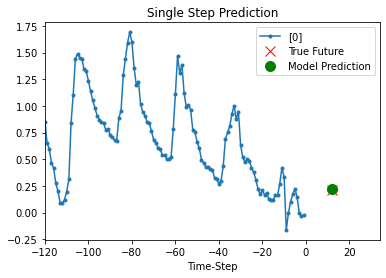

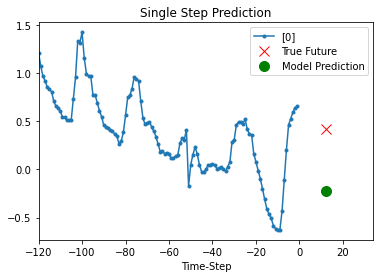

In [88]:
for x, y in dataset_val.take(2):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )